# Домашня робота №9

# Незалежність та некорельованість
На цьому занятті ми розглянемо випадкові вектори, складені з випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Класи для 3D графіків

In [11]:
# Class that anables 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Class of color maps
from matplotlib import cm

# This line makes 3D plots in Jupyter Notebook interactive (uncomment to anable)
# %matplotlib notebook

## 2 Багатовимірний нормальний розподіл

Випадкова величина $\zeta$ має $k$-вимірний нормальний розподіл з вектором середніх $\mu$ та матрицею коваріацій $\Sigma$,
тобто $\zeta \sim N_k(\mu, \Sigma)$,
якщо її щільність дорівнює:
$$f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp \left\{ -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right\}.$$

Детальна інформація про клас `multivariate_normal` в [документації](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.multivariate_normal.html).

In [4]:
from scipy.stats import multivariate_normal

### 2.1 Зміна матриці коваріацій

#### 2.1.1 Завдання 2.1.1

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 0 \\ 0\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}.$$

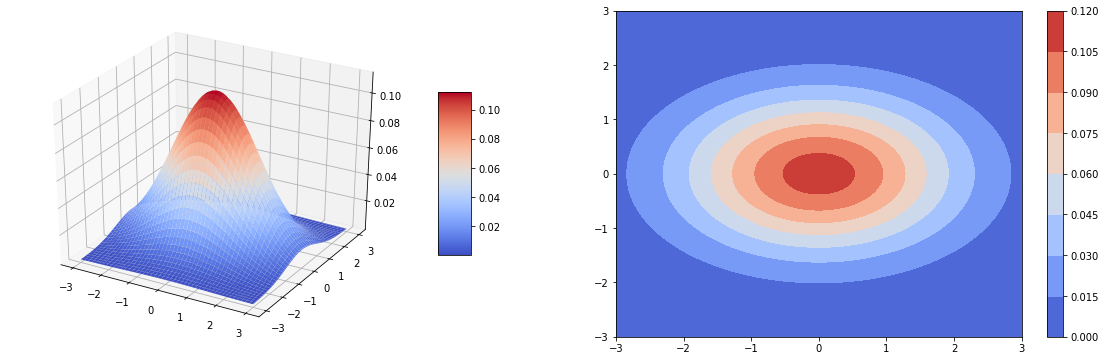

In [5]:
# Місце для Вашого коду
mean = [0, 0]
cov = [[2, 0],
       [0, 1]]

zeta = multivariate_normal(mean=mean, cov=cov)

x = np.arange(-3, 3.01, 0.01)
y = np.arange(-3, 3.01, 0.01)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))
z = zeta.pdf(pos)

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x,y,z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax2 = fig.add_subplot(122)
cont = ax2.contourf(x,y,z, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()


#### 2.1.2 Завдання 2.1.2

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 1 \\ -1\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}.$$

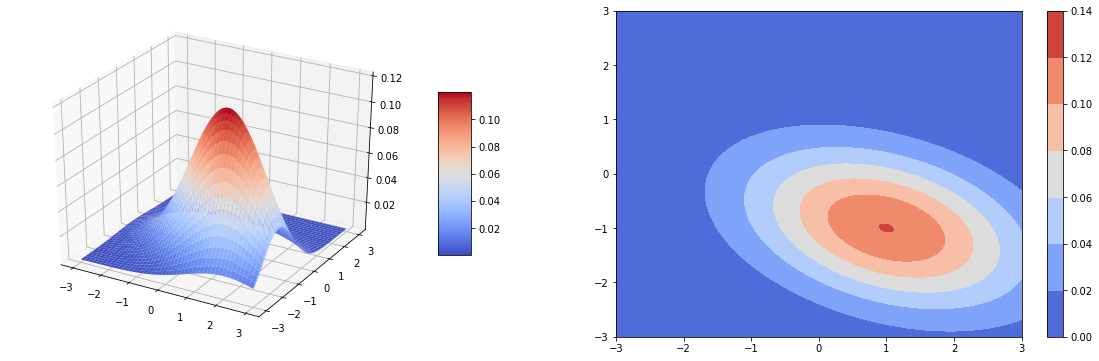

In [6]:
# Місце для Вашого коду
mean = [1, -1]
cov = [[2, -0.5],
       [-0.5, 1]]

zeta = multivariate_normal(mean=mean, cov=cov)

x = np.arange(-3, 3.01, 0.01)
y = np.arange(-3, 3.01, 0.01)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))
z = zeta.pdf(pos)

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x,y,z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax2 = fig.add_subplot(122)
cont = ax2.contourf(x,y,z, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()


## 3 Некорельованість не означає незалежність

### 3.1 Задача 1.16.13

Нехай $Z = X Y$, де $X \sim N(0, 1)$ не залежить від $Y$ і $P(Y = 1) = P(Y = -1) = \frac{1}{2}$.
Покажіть, що $Z \sim N(0, 1)$ і що $X$ та $Z$ некорельовані, але залежні.
Знайдіть розподіл пар $(X, Z)$ та $(Y, Z)$, а також розподіл $X + Z$.

1. Згенеруйте $n = 100000$ значень випадкових величин $X, Y$;
2. Отримайте $n = 100000$ значень випадкової величини $Z$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $Z$;
   - функцію щільності випадкової величини $Z$.
4. Виведіть матрицю коваріацій між значеннями випадкових величин $X$ та $Z$.
5. Для значень $X$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $Y$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Зобразіть на графіку:
   - нормовану гістограму $n = 100000$ значень випадкової величини $X+Z$;
   - функцію щільності випадкової величини $X+Z$.

In [13]:
def stuf3d(n, rvs1, rvs2, ax1, ax2, a3, title, n_bins = 24, x_range = [-3, 3], y_range = [-3, 3]):
    n = 100000
    x = rvs1
    y = rvs2
    ax1.set_title("3D histogram for: "+ title)
    ax2.set_title("Contour plot for: " + title)
    ax3.set_title("Scatter plot for: " + title)
    # Compute the bi-dimensional histogram
    
    xy_range = [x_range, y_range]
    hist, xedges, yedges = np.histogram2d(x, y, bins=n_bins, range=xy_range)

    # Construct arrays for the anchor positions of the bars.
    xpos1, ypos1 = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
    xpos = xpos1.ravel()
    ypos = ypos1.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the bars.
    dx = dy = 0.2 * np.ones_like(zpos)
    dz = hist.ravel()
    x_length = (x_range[1] - x_range[0]) / n_bins
    y_length = (y_range[1] - y_range[0]) / n_bins
    dz_normed = dz / (n * x_length * y_length)

    # Make color map with 8 colors
    colors = cm.get_cmap('viridis', 8)

    # Plot 3D histogram
    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz_normed, color=colors(dz_normed / dz_normed.max()), zsort='average')

    # Add color bar
    colourMap = plt.cm.ScalarMappable(cmap=colors)
    colourMap.set_array(dz_normed)
    colBar = plt.colorbar(colourMap)

    # Make contour plot
    normed_hist = hist / (n * x_length * y_length)
    ax2.contourf(xpos1, ypos1, normed_hist, cmap=colors)
    
    #Scatter plot
    ax3.plot(x, y, 'o', markersize=1)


By np.cov:
[[ 0.99827937 -0.00275713]
 [-0.00275713  0.99995375]].


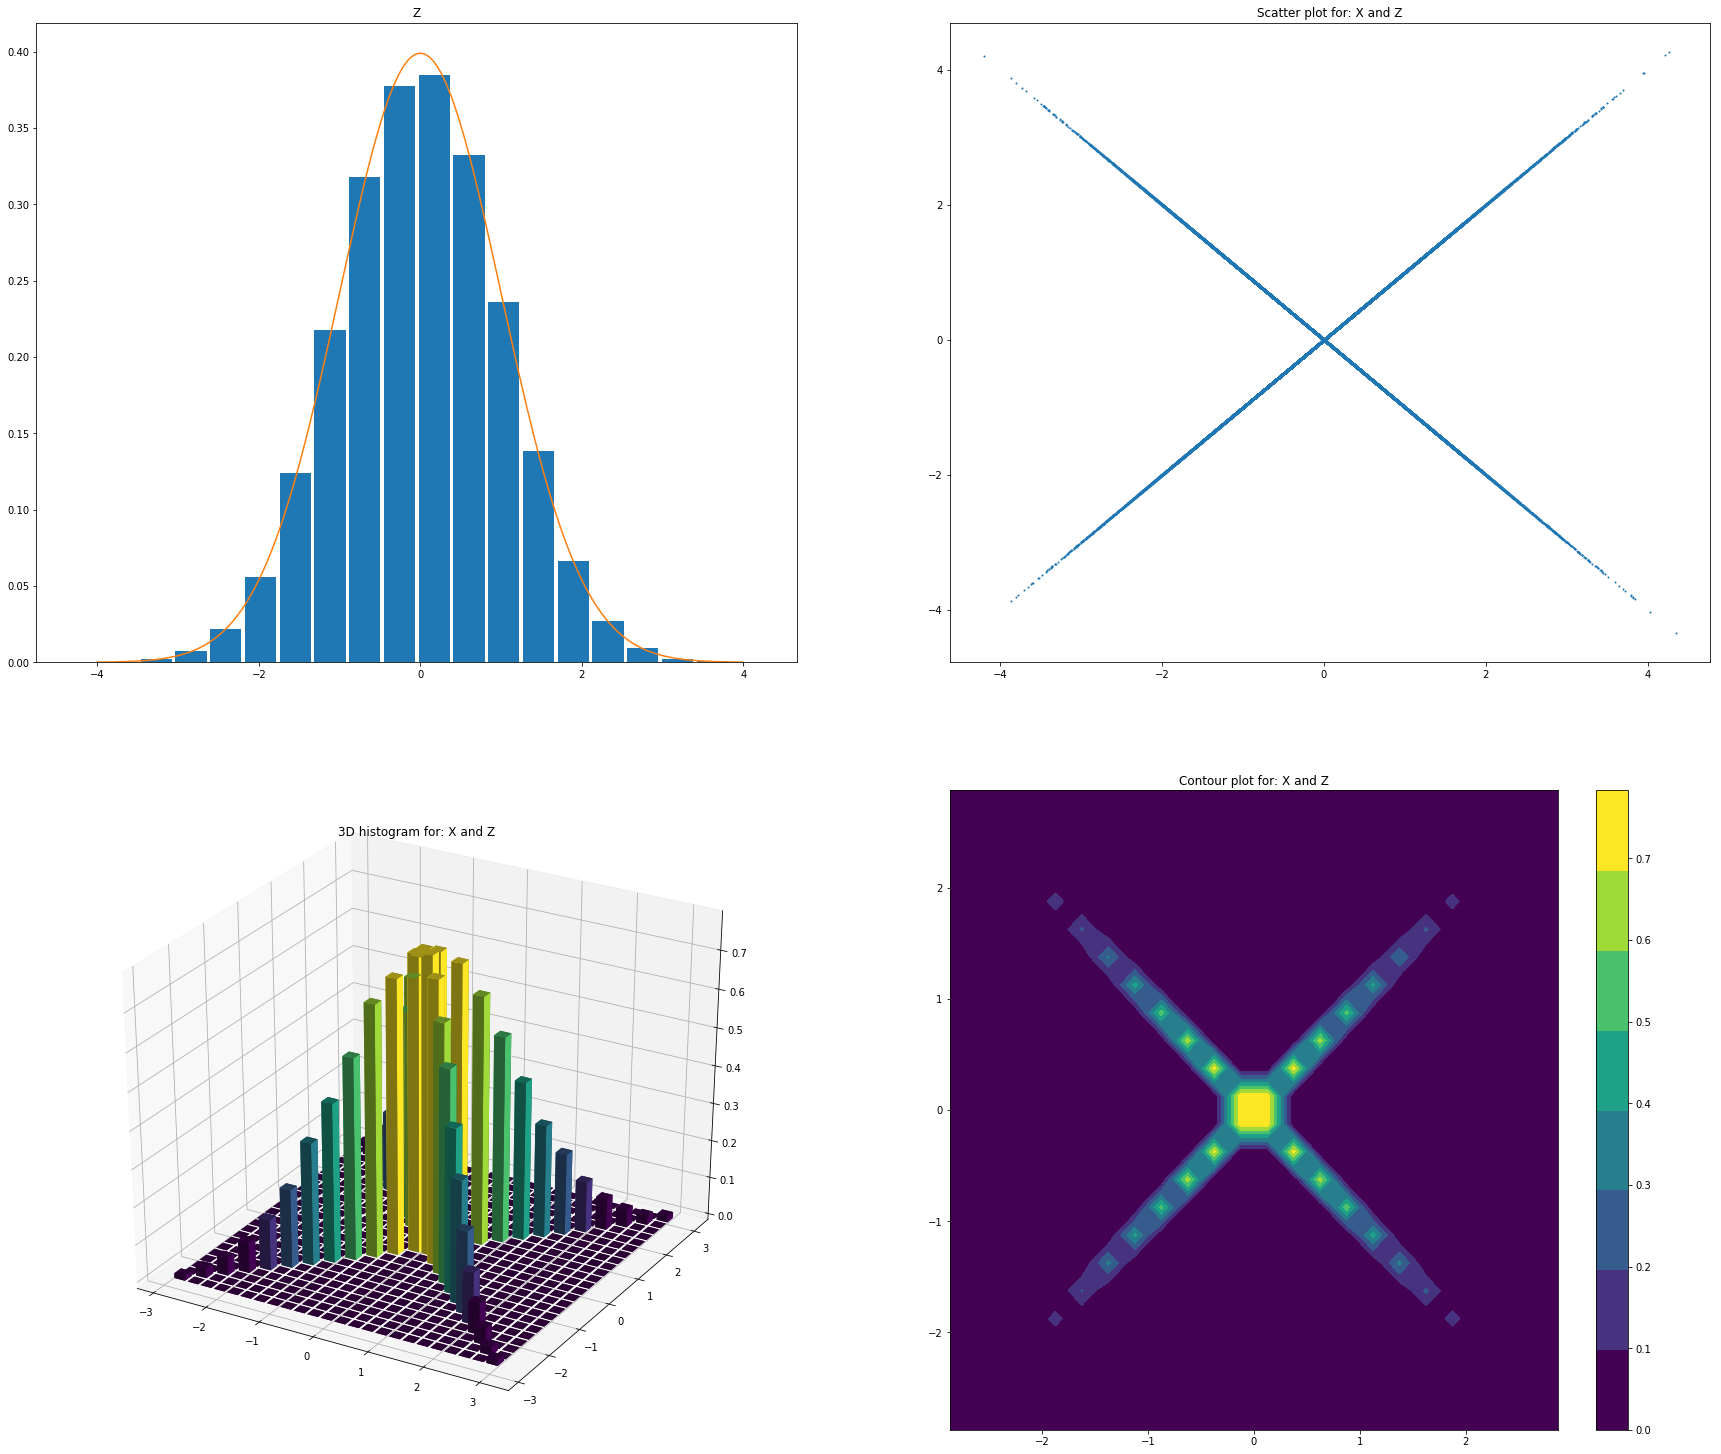

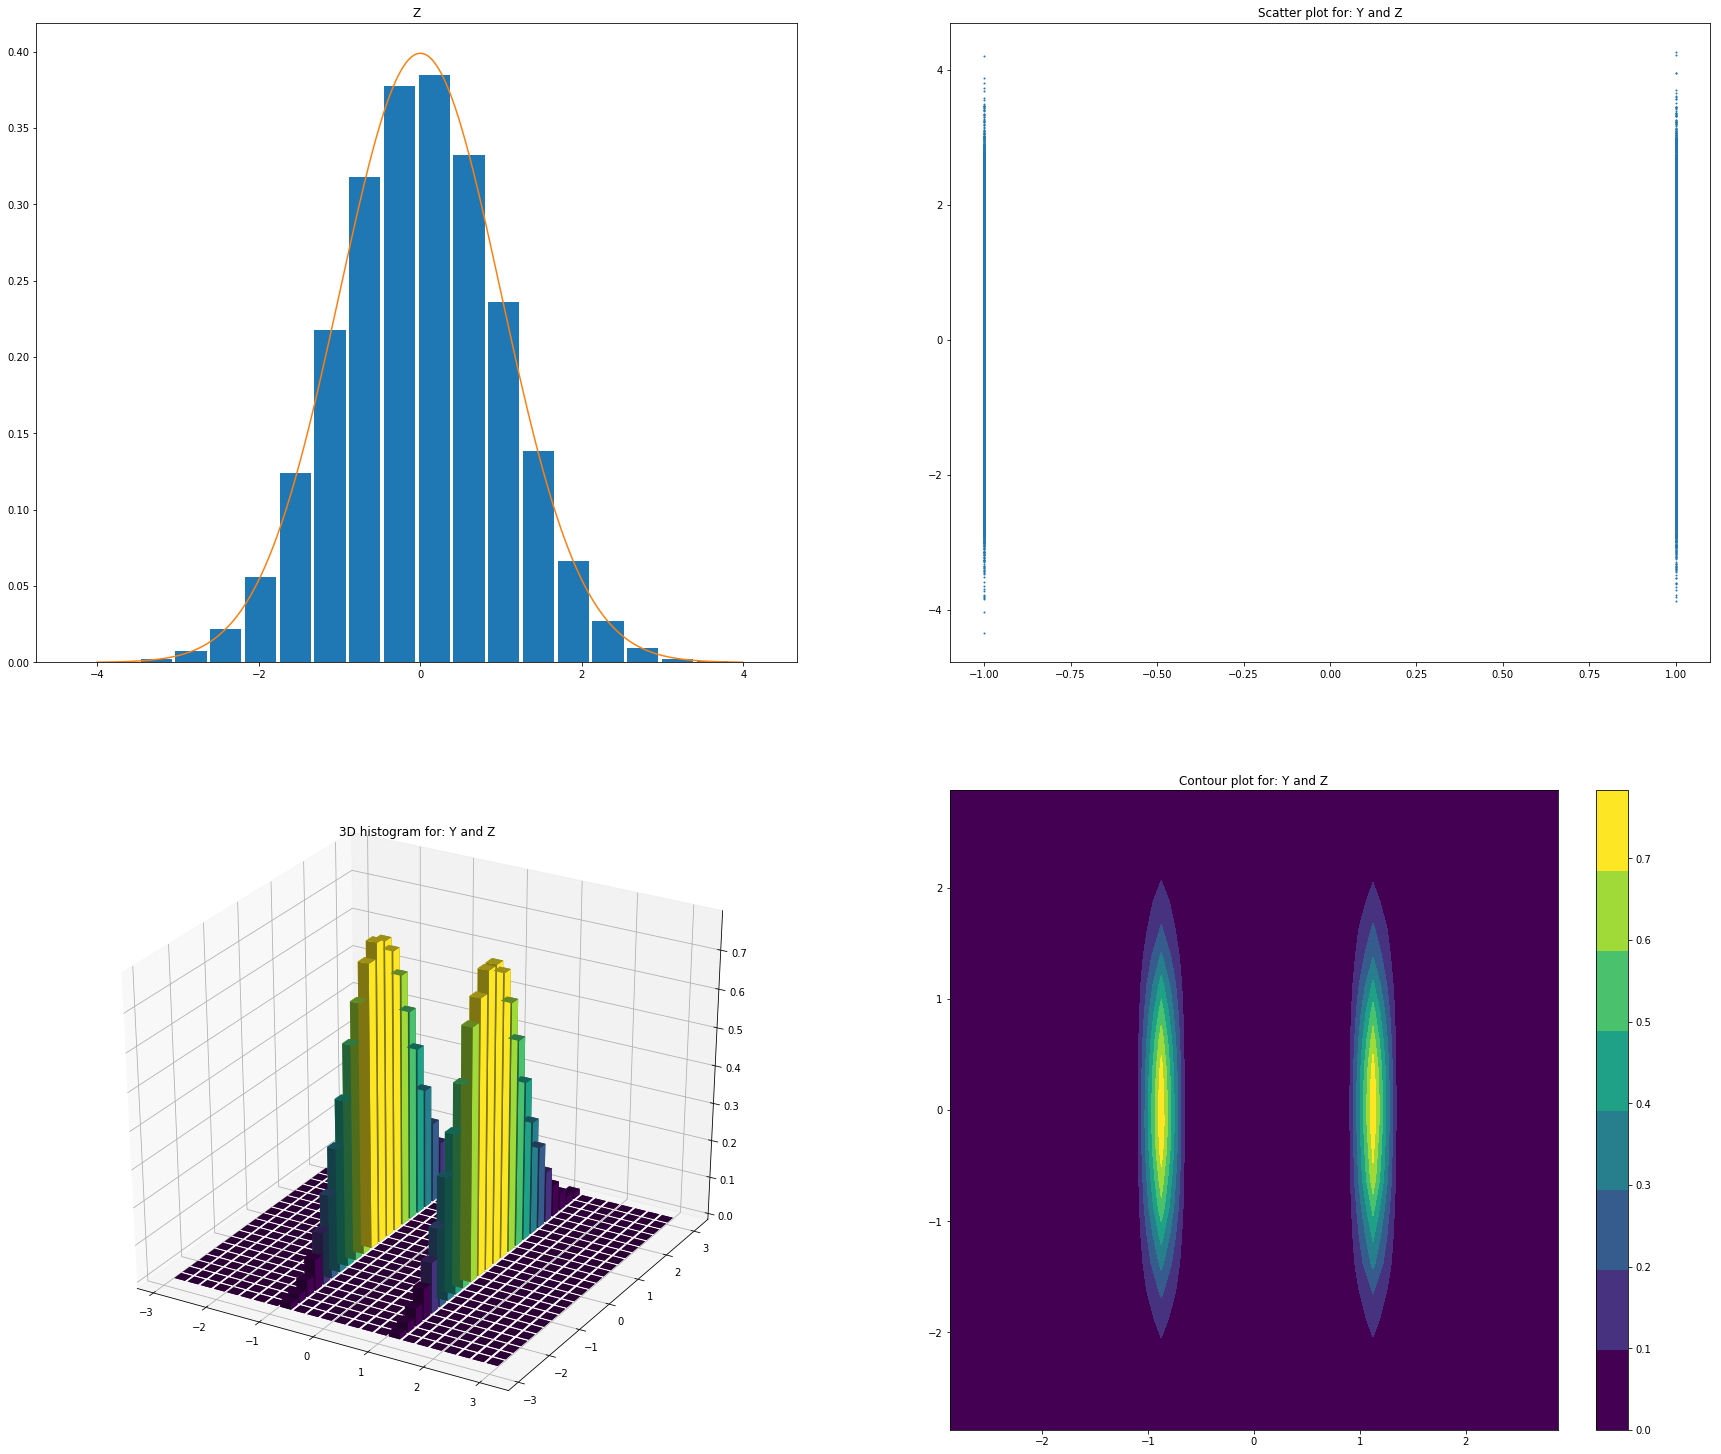

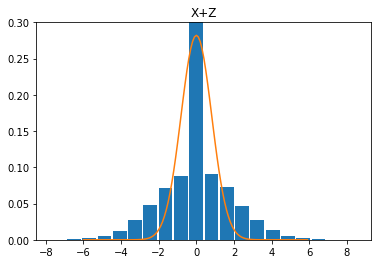

In [14]:
# Місце для Вашого коду
from scipy.stats import norm
from scipy import stats

X = norm()
Y = stats.rv_discrete(values=([-1,1], (1/2, 1/2)))

rvs_X = X.rvs(100000)
rvs_Y = Y.rvs(size=100000)
rvs_Z = rvs_X*rvs_Y


cov_matrix = np.matrix([[1,0],[0,1]])

print("By np.cov:\n{}.".format(np.cov(rvs_X,rvs_Y)))
#--------------------------------------------------------------------------------------------
# Prepare the figure
fig = plt.figure(figsize=(30,40))
ax = fig.add_subplot(321)
ax3 = fig.add_subplot(322)
ax1 = fig.add_subplot(323, projection='3d')
ax2 = fig.add_subplot(324)


x = np.arange(-4,4,0.01)
ax.hist(rvs_Z, bins=20, rwidth=0.9, density=True)
ax.plot(x, norm().pdf(x))
ax.set_title("Z")

stuf3d(100000,rvs_X,rvs_Z,ax1,ax2,ax3,"X and Z")
plt.show()
#-----------------------------------------------------------------------------------------------------------------

# Prepare the figure
fig = plt.figure(figsize=(30,40))
ax = fig.add_subplot(321)
ax3 = fig.add_subplot(322)
ax1 = fig.add_subplot(323, projection='3d')
ax2 = fig.add_subplot(324)


x = np.arange(-4,4,0.01)
ax.hist(rvs_Z, bins=20, rwidth=0.9, density=True)
ax.plot(x, norm().pdf(x))
ax.set_title("Z")
stuf3d(100000,rvs_Y,rvs_Z,ax1,ax2,ax3,"Y and Z")
plt.show()
#---------------------------------------------------------------------------------
x = np.arange(-6,6,0.1)
plt.hist(rvs_X+rvs_Z, bins=20, rwidth=0.9, density=True)
rv4 = lambda x: 1/(2*np.sqrt(np.pi))*np.exp(-3*x**2/4)
plt.plot(x, rv4(x))
plt.ylim([0,0.3])
plt.title("X+Z")
plt.show()

## 4 Незалежність випадкових величин з Домашньої роботи №8

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= \frac{\xi_1}{\xi_1 + \xi_2} \sim Uniform(0, 1), \\
\zeta_2 &= \xi_1 + \xi_2 \sim \Gamma(2)
\end{aligned}
$$
незалежні.
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 100000$ значень випадкових величин $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.
5. Для значень двох незалежних випадкових величин $\eta_1 \sim Uniform(0, 1), \eta_2 \sim \Gamma(2)$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.

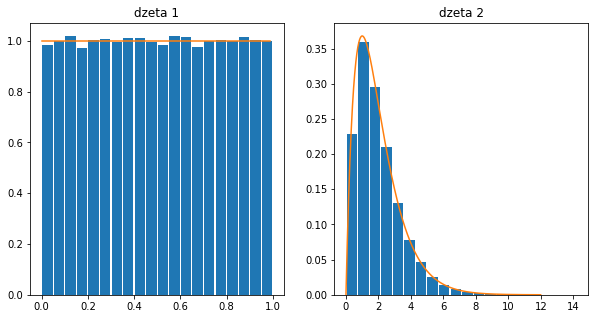

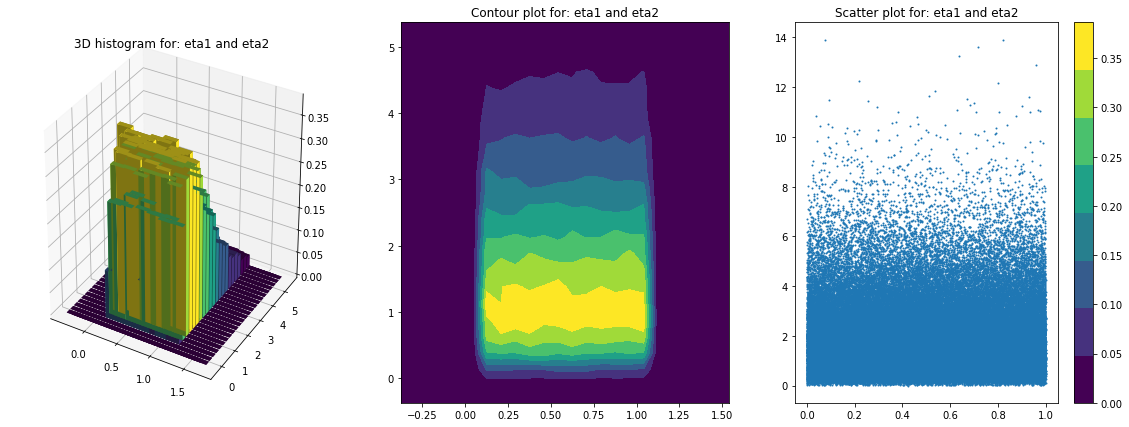

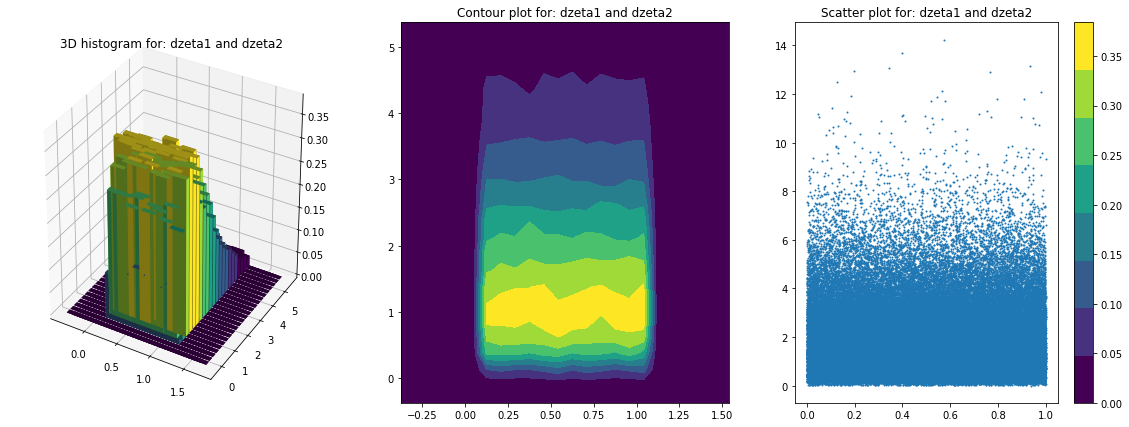

In [19]:
# Місце для Вашого коду
from scipy.stats import uniform, gamma, expon
from scipy.stats import pearsonr, spearmanr

fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rv1 = expon()
rv2 = expon()

rvs1 = rv1.rvs(100000)
rvs2 = rv2.rvs(100000)

rvs_dzeta1 = rvs1 / (rvs1 + rvs2)
x = np.arange(0, 1, 0.01)
ax1.hist(rvs_dzeta1, bins=20, density=True, rwidth=0.9)
ax1.plot(x, [1]*len(x))
ax1.set_title("dzeta 1")

rvs1 = rv1.rvs(100000)
rvs2 = rv2.rvs(100000)

rvs_dzeta2 = rvs1 + rvs2
x = np.arange(0, 12, 0.01)
ax2.hist(rvs_dzeta2, bins=20, rwidth=0.9, density=True)
ax2.plot(x, x * np.exp(-x))
ax2.set_title("dzeta 2")

plt.show()

fig = plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
stuf3d(10000, uniform.rvs(0,1, size=100000), gamma.rvs(2, size=100000),
       ax1, ax2, ax3, "eta1 and eta2",x_range=[-0.5,1.5], y_range=[-0.5,5.5])


plt.show()

fig = plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
stuf3d(10000, rvs_dzeta1, rvs_dzeta2, ax1, ax2, ax3, "dzeta1 and dzeta2",x_range=[-0.5,1.5], y_range=[-0.5,5.5])


plt.show()


## 5 Генерування залежних випадкових величин

### 5.1 Нормальний розподіл

Нехай $\zeta = (\zeta_1, \zeta_2)^T \sim N_2(\textbf{0}, I)$, тобто $\zeta_1, \zeta_2 \sim N(0, 1)$ &mdash; незалежні,
$A$ &mdash; матриця $2 \times 2$, $m$ &mdash; вектор $2 \times 1$.
Тоді
$$A \zeta + m \sim N_2 (m, A A^T).$$

#### 5.1.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Згенеруйте випадковий вектор $\zeta = (\zeta_1, \zeta_2)$ з $2$-вимірного нормального розподілу з параметрами
$$
\mu = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}
$$
за допомогою лінійного перетворення випадкових величин $\xi_1, \xi_2$ та розкладу Холецького матриці $\Sigma$.

1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2 \sim N(0,1)$;
2. Отримайте $n = 100000$ значень $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



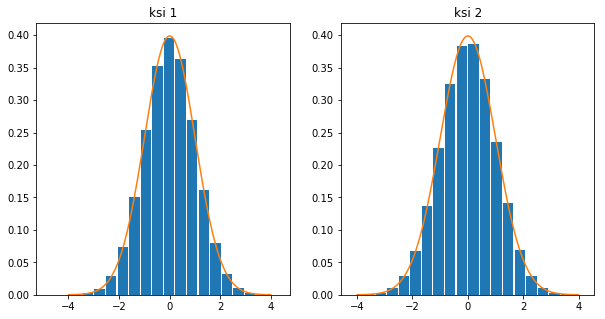

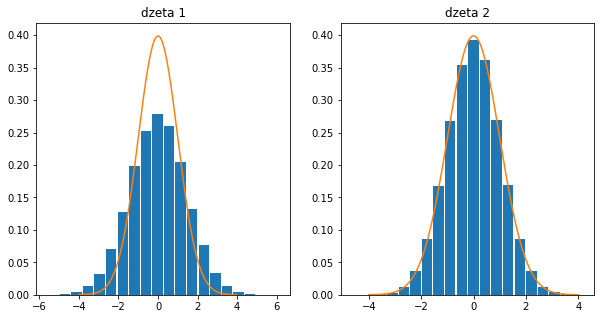

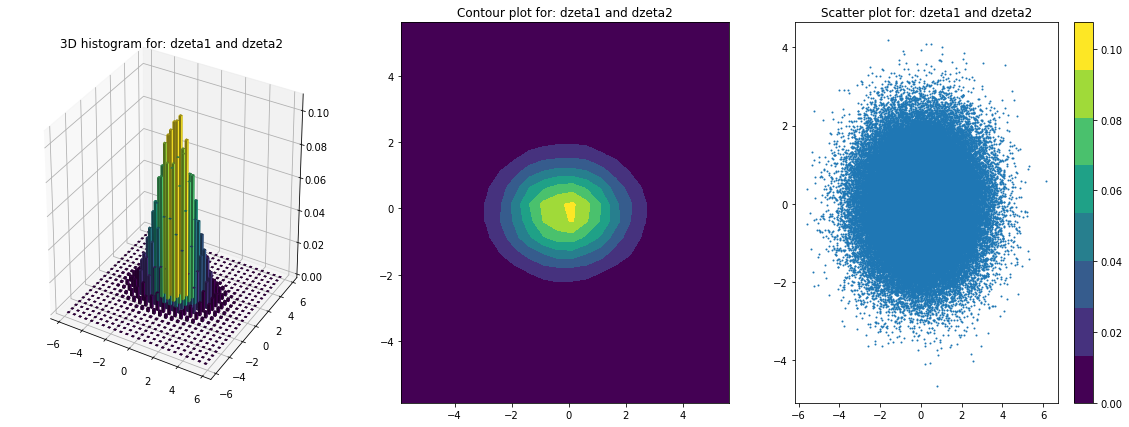

Covariation matrix
[[ 1.9966398  -0.00377985]
 [-0.00377985  1.00669295]]
Pearson coef
(-0.0026660973766612877, 0.3991809201959067)
Spearman coef
SpearmanrResult(correlation=-0.0025472263340547228, pvalue=0.42053413038672904)


In [20]:
# Місце для Вашого коду
from scipy.stats import norm

mean = [0, 0]
cov = [[2, 0],
       [0, 1]]

ch = np.linalg.cholesky(cov)

rvs_vector = list(zip(norm().rvs(size=100000), norm().rvs(size=100000))) #ksi 1 and 2
dzeta_rvs = np.array([np.matrix(ch)*np.transpose(np.matrix(a))+np.transpose(np.matrix(mean)) for a in rvs_vector])
dzeta_1 = [i[0][0] for i in dzeta_rvs]
dzeta_2 = [i[1][0] for i in dzeta_rvs]

print(dzeta_1, dzeta_2)

fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = np.arange(-4,4,0.01)

ax1.hist(norm().rvs(size=100000), bins=20, density=True, rwidth=0.9)
ax1.plot(x, norm.pdf(x))
ax1.set_title("ksi 1")

ax2.hist(norm().rvs(size=100000), bins=20, density=True, rwidth=0.9)
ax2.plot(x, norm.pdf(x))
ax2.set_title("ksi 2")

plt.show()

fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = np.arange(-4,4,0.01)

ax1.hist(dzeta_1, bins=20, density=True, rwidth=0.9)
ax1.plot(x, norm.pdf(x)) 
ax1.set_title("dzeta 1")
ax2.hist(dzeta_2, bins=20, density=True, rwidth=0.9)
ax2.plot(x, norm.pdf(x))
ax2.set_title("dzeta 2")

fig = plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
stuf3d(10000, dzeta_1, dzeta_2, ax1, ax2, ax3, "dzeta1 and dzeta2",x_range=[-6,6], y_range=[-6,6])



plt.show()
print("Covariation matrix")
print(np.cov(dzeta_1, dzeta_2))
print("Pearson coef")
print(pearsonr(dzeta_1, dzeta_2))
print("Spearman coef")
print(spearmanr(dzeta_1, dzeta_2))


### 5.2 Експоненційний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.2.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $u_1, u_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $u_1, u_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Тоді
$$
\begin{aligned}
\xi_1 &= F^{-1}(u_1) \sim Exp(1), \\
\xi_2 &= F^{-1}(u_2) \sim Exp(1), \\
\xi_1^a &= F^{-1}(1-u_1) \sim Exp(1), \\
\xi_2^a &= F^{-1}(1-u_2) \sim Exp(1),
\end{aligned}
$$
де $F$ &mdash; функція розподілу стандартного експоненційного розподілу.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= (1 - p) \xi_1 + \eta_1 \xi_2 \sim Exp(1), \\
\zeta_2 &= (1 - p) \xi_2^a + \eta_2 \xi_1^a \sim Exp(1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&2 p (1 - p)(-0.6449) - (1 - p)^2, & p \geq 1/2, \\
&2 p (1 - p)(-0.6449) - p^2, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $u_1, u_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\xi_1, \xi_2, \xi_1^a, \xi_2^a, \zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1^a$;
   - функцію щільності випадкової величини $\xi_1^a$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2^a$;
   - функцію щільності випадкової величини $\xi_2^a$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

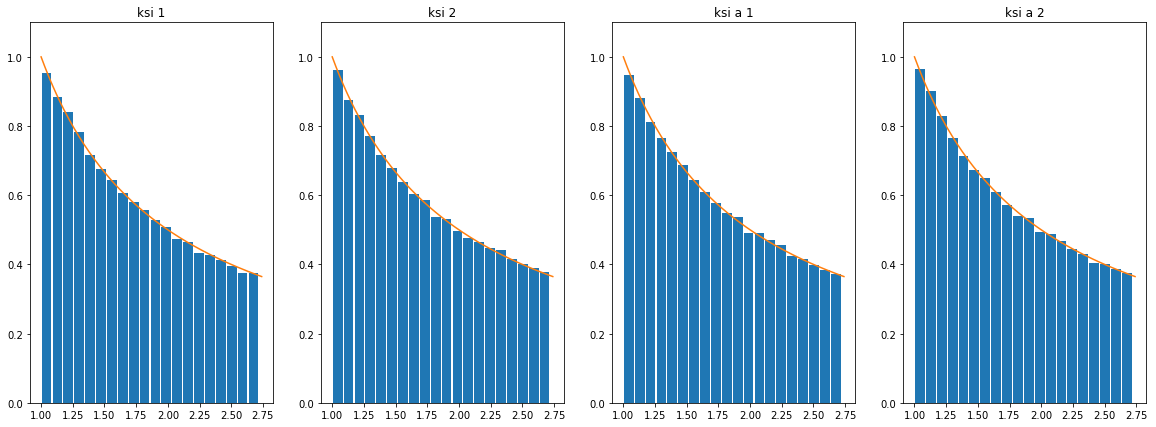

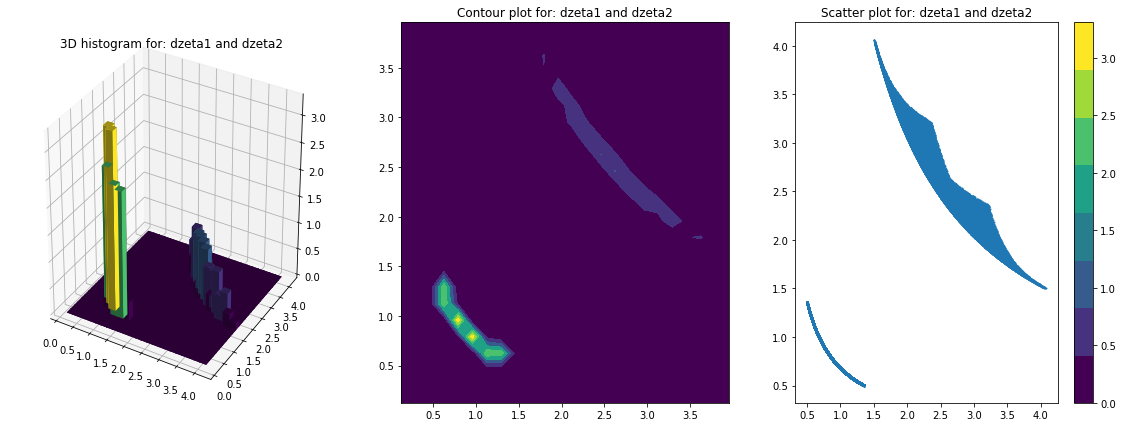

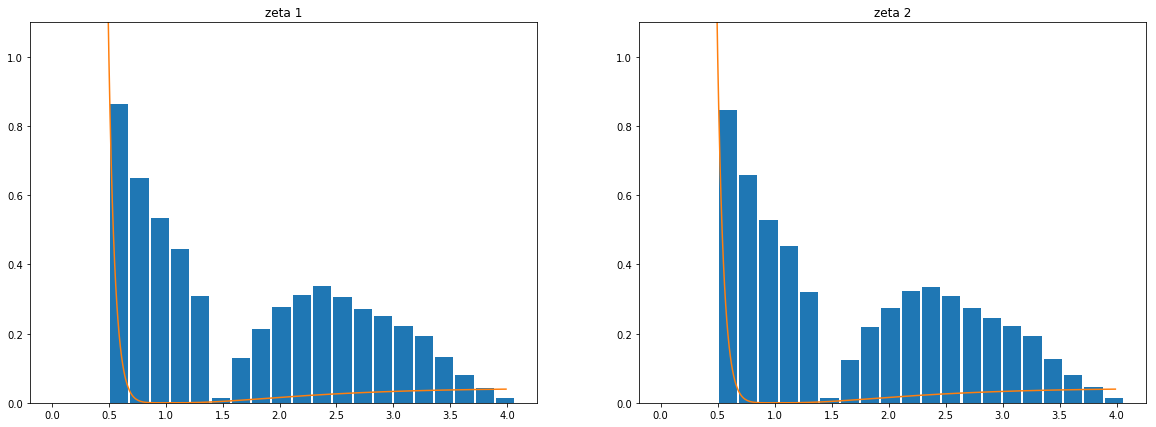

Theoretical correlation
-0.57245
Covariation matrix
[[ 2.00852205 -0.00443632]
 [-0.00443632  0.99131264]]
Pearson coef
(-0.0031439761679857912, 0.3201242479151989)
Spearman coef
SpearmanrResult(correlation=-0.0012851657425285168, pvalue=0.6844485878724815)


In [18]:
# Місце для Вашого коду
from scipy.stats import uniform, bernoulli
u1 = u2 = uniform(0, 1)
eta1 = eta2 = bernoulli(1/2)
N = 100000
p =1/2
F_1 = lambda x: np.exp(x)

u1_rvs = u1.rvs(size=N)
u2_rvs = u2.rvs(size=N)
eta1_rvs = eta2.rvs(size=N)
eta2_rvs = eta2.rvs(size=N)

ksi1_rvs = F_1(u1_rvs)
ksi2_rvs = F_1(u2_rvs)
ksi_a_1_rvs = F_1(1-u1_rvs)
ksi_a_2_rvs = F_1(1-u2_rvs)

func = lambda x: 1/x
x = np.arange(1,2.75,0.01)

fig = plt.figure(figsize=[20,7])

ax1 = fig.add_subplot(141)
ax1.set_ylim([0,1.1])
ax1.hist(ksi1_rvs, bins=20, density=True, rwidth=0.9)
ax1.plot(x, func(x)) 
ax1.set_title("ksi 1")

ax2 = fig.add_subplot(142)
ax2.set_ylim([0,1.1])
ax2.hist(ksi2_rvs, bins=20, density=True, rwidth=0.9)
ax2.plot(x, func(x))
ax2.set_title("ksi 2")

ax3 = fig.add_subplot(143)
ax3.set_ylim([0,1.1])
ax3.hist(ksi_a_1_rvs, bins=20, density=True, rwidth=0.9)
ax3.plot(x, func(x))
ax3.set_title("ksi a 1")

ax4 = fig.add_subplot(144)
ax4.set_ylim([0,1.1])
ax4.hist(ksi_a_2_rvs, bins=20, density=True, rwidth=0.9)
ax4.plot(x, func(x))
ax4.set_title("ksi a 2")
plt.show()



zeta1_rvs = (1-p)*ksi1_rvs+eta1_rvs*ksi2_rvs
zeta2_rvs = (1-p)*ksi_a_1_rvs+eta1_rvs*ksi_a_2_rvs

fig = plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
stuf3d(10000, zeta1_rvs, zeta2_rvs, ax1, ax2, ax3, "dzeta1 and dzeta2",x_range=[0,4], y_range=[0,4])
plt.show()

fig = plt.figure(figsize=[20,7])

x = np.arange(0.01, 4 ,0.01)
zeta_f = lambda x: (1-(x))**4/(2*x**5)#??????????????

ax1 = fig.add_subplot(121)
ax1.set_ylim([0,1.1])
ax1.hist(zeta1_rvs, bins=20, density=True, rwidth=0.9)
ax1.plot(x, zeta_f(x)) 
ax1.set_title("zeta 1")

ax2 = fig.add_subplot(122)
ax2.set_ylim([0,1.1])
ax2.hist(zeta2_rvs, bins=20, density=True, rwidth=0.9)
ax2.plot(x, zeta_f(x))
ax2.set_title("zeta 2")

plt.show()
th_corr = lambda x: 2*p*(1-p)*(-0.6449)-(1-p)*2 if p>1/2 else 2*p*(1-p)*(-0.6449)-p**2


print("Theoretical correlation")
print(th_corr(p))
print("Covariation matrix")
print(np.cov(dzeta_1, dzeta_2))
print("Pearson coef")
print(pearsonr(dzeta_1, dzeta_2))
print("Spearman coef")
print(spearmanr(dzeta_1, dzeta_2))



### 5.3 Рівномірний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.3.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= 1 - \xi_1^{(1 - p)} \xi_2^{\eta_1} \sim Uniform(0, 1), \\
\zeta_2 &= 1 - (1-\xi_2)^{(1 - p)} (1-\xi_1)^{\eta_2} \sim Uniform(0, 1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&\frac{-3 (1-p) (4 + 5(1-p) + 6(1-p)^2 + (1-p)^3)}{(2-p)^2 (3-p)^2}, & p \geq 1/2, \\
&\frac{-3 p (2 + 3(1-p) - (1-p)^2)}{(2-p)^2 (3-p)}, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

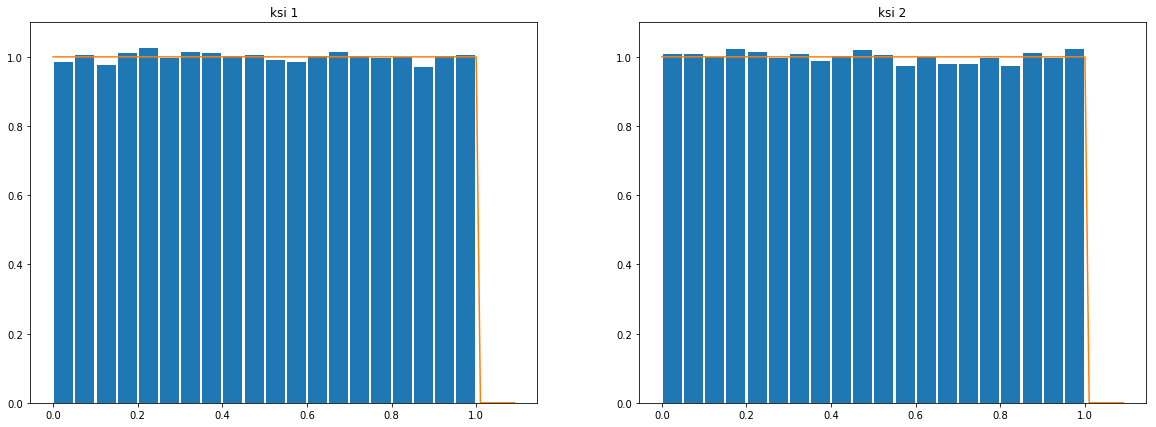

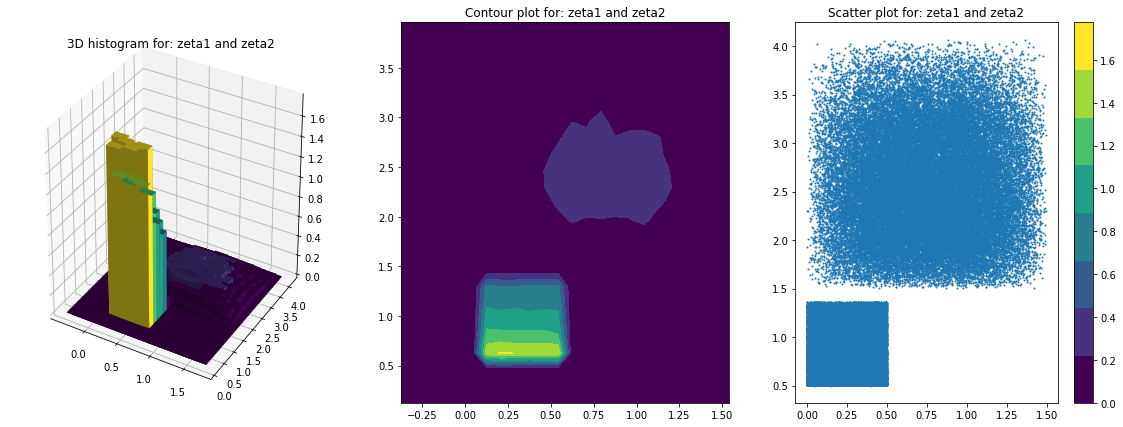

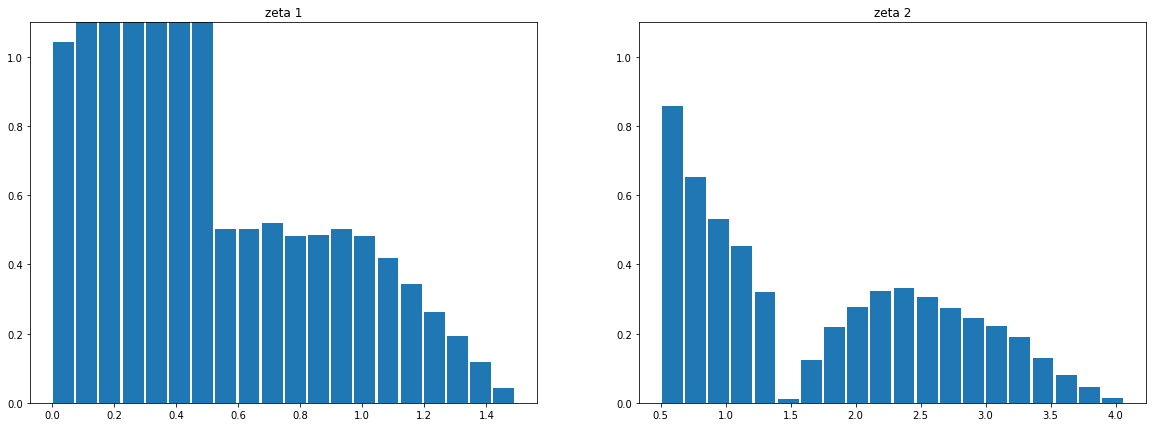

In [21]:
# Місце для Вашого коду
from scipy.stats import uniform, bernoulli
ksi1 = ksi2 = uniform(0, 1)
eta1 = eta2 = bernoulli(1/2)
N = 100000
p =1/2
F_1 = lambda x: np.exp(x)

ksi1_rvs = ksi1.rvs(size=N)
ksi2_rvs = ksi1.rvs(size=N)
eta1_rvs = eta2.rvs(size=N)
eta2_rvs = eta2.rvs(size=N)

zeta1_rvs = 1-ksi1_rvs**(1-p)*ksi2_rvs**eta1_rvs
zeta2_rvs = 1-(1-ksi2_rvs)**(1-p)*(1-ksi1_rvs)**eta2_rvs



func = lambda x: 1/x
x = np.arange(0,1.1,0.01)

fig = plt.figure(figsize=[20,7])

ax1 = fig.add_subplot(121)
ax1.set_ylim([0,1.1])
ax1.hist(ksi1_rvs, bins=20, density=True, rwidth=0.9)
ax1.plot(x, ksi1.pdf(x)) 
ax1.set_title("ksi 1")

ax2 = fig.add_subplot(122)
ax2.set_ylim([0,1.1])
ax2.hist(ksi2_rvs, bins=20, density=True, rwidth=0.9)
ax2.plot(x, ksi1.pdf(x))
ax2.set_title("ksi 2")
plt.show()

zeta1_rvs = (1-p)*ksi1_rvs+eta1_rvs*ksi2_rvs
zeta2_rvs = (1-p)*ksi_a_1_rvs+eta1_rvs*ksi_a_2_rvs

fig = plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
stuf3d(10000, zeta1_rvs, zeta2_rvs, ax1, ax2, ax3, "zeta1 and zeta2",x_range=[-0.5,1.5], y_range=[0,4])
plt.show()

fig = plt.figure(figsize=[20,7])

ax1 = fig.add_subplot(121)
ax1.set_ylim([0,1.1])
ax1.hist(zeta1_rvs, bins=20, density=True, rwidth=0.9)
ax1.set_title("zeta 1")

ax2 = fig.add_subplot(122)
ax2.set_ylim([0,1.1])
ax2.hist(zeta2_rvs, bins=20, density=True, rwidth=0.9)
ax2.set_title("zeta 2")


plt.show()

